In [56]:
import pandas as pd
import numpy as np

In [57]:
data = pd.read_csv("kindle_data-v2.csv")

In [58]:
data.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

### Checking Empty Values

In [60]:
data.isnull().any()

asin                 False
title                False
author                True
soldBy                True
imgUrl               False
productURL           False
stars                False
reviews              False
price                False
isKindleUnlimited    False
category_id          False
isBestSeller         False
isEditorsPick        False
isGoodReadsChoice    False
publishedDate         True
category_name        False
dtype: bool

#### Author, Sold and Published Date have empty values

### Checking all values where there is Nan

In [61]:
df1 = data[data["author"].isna()]
df1.head(2)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
747,B098KJT3HT,"Deceived (Bound by Loyalty, Honor, Truth Book 1)",NaN,Amazon.com Services LLC,https://m.media-amazon.com/images/I/61MPpEc6tF...,https://www.amazon.com/dp/B098KJT3HT,4.5,0,3.99,True,6,True,False,False,NaN,Parenting & Relationships
774,B092MV1G8G,Christmas Wishes at Pudding Hall: A gorgeous C...,NaN,Amazon.com Services LLC,https://m.media-amazon.com/images/I/91UYKdu8km...,https://www.amazon.com/dp/B092MV1G8G,4.5,0,3.99,True,6,False,False,False,NaN,Parenting & Relationships


#### If the missing author names are few, we might consider imputing them with a placeholder value like "Unknown Author" since the author's name might not have a numerical impact on analyses but is crucial for identification.

In [62]:
data['author'].fillna('Unknown Author', inplace=True)

In [63]:
df1 = data[data["soldBy"].isna()]
df1.head(2)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
32,B09RX42621,It Starts with Us: the highly anticipated sequ...,Colleen Hoover,NaN,https://m.media-amazon.com/images/I/81G91BUSHs...,https://www.amazon.com/dp/B09RX42621,4.5,0,0.0,False,6,False,True,False,2022-10-18,Parenting & Relationships
33,B017RNBS3A,It Ends With Us: The emotional #1 Sunday Times...,Colleen Hoover,NaN,https://m.media-amazon.com/images/I/817vqET828...,https://www.amazon.com/dp/B017RNBS3A,4.7,0,0.0,False,6,False,False,True,2016-08-02,Parenting & Relationships


#### Since this is likely categorical, you could fill in missing values with the most common 'soldBy' value.

In [64]:
most_common_seller = data['soldBy'].mode()[0]
data['soldBy'].fillna(most_common_seller, inplace=True)

In [65]:
df1 = data[data["publishedDate"].isna()]
df1.head(2)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
6,B00AEBEQUK,Expecting Better: Why the Conventional Pregnan...,Emily Oster,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/81NYWaTY6-...,https://www.amazon.com/dp/B00AEBEQUK,4.6,0,14.99,False,6,True,False,False,NaN,Parenting & Relationships
10,B00AN2JPNI,Moms on Call | Basic Baby Care 0-6 Months | Pa...,Laura Hunter LPN,Amazon.com Services LLC,https://m.media-amazon.com/images/I/717AozsjVZ...,https://www.amazon.com/dp/B00AN2JPNI,4.7,0,24.99,False,6,False,False,False,NaN,Parenting & Relationships


In [66]:
data["publishedDate"].isna().value_counts()

False    84086
True     49016
Name: publishedDate, dtype: int64

#### Since values are too many to drop -> create 1 more variable 'publishedYear' and use that -> drop the date

In [67]:
data.isnull().any()

asin                 False
title                False
author               False
soldBy               False
imgUrl               False
productURL           False
stars                False
reviews              False
price                False
isKindleUnlimited    False
category_id          False
isBestSeller         False
isEditorsPick        False
isGoodReadsChoice    False
publishedDate         True
category_name        False
dtype: bool

In [68]:
data['publishedYear'] = pd.DatetimeIndex(data['publishedDate']).year

In [70]:
data['publishedYear'].isnull().value_counts()

False    84086
True     49016
Name: publishedYear, dtype: int64

In [75]:
data['publishedYear'].fillna(0, inplace=True)

In [76]:
data['publishedYear'].isnull().value_counts()

False    133102
Name: publishedYear, dtype: int64

In [80]:
data = data.drop(['publishedDate'], axis=1)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             133102 non-null  object 
 3   soldBy             133102 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  category_name      133102 non-null  object 
 15  publishedYear      133102 non-null  float64
dtypes:

### Normalizing

#### Normalizing the Price between 0 and 1

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data['normalized_price'] = scaler.fit_transform(data[['price']])

#### Normalizing the Reviews between 0 and 1

In [92]:
data['normalized_reviews'] = scaler.fit_transform(data[['reviews']])

In [93]:
data[['price', 'normalized_price', 'reviews', 'normalized_reviews']]

,price,normalized_price,reviews,normalized_reviews
0,9.99,0.014648,0,0.0
1,16.99,0.024912,0,0.0
2,16.99,0.024912,0,0.0
3,9.95,0.014589,0,0.0
4,13.99,0.020513,0,0.0
...,...,...,...,...
133097,0.00,0.000000,0,0.0
133098,9.99,0.014648,0,0.0
133099,1.99,0.002918,0,0.0
133100,0.00,0.000000,0,0.0


### Statistical Analysis

#### Numerical Values

In [95]:
stats_description = data.describe()
stats_description

,stars,reviews,price,category_id,publishedYear,normalized_price,normalized_reviews
count,133102.000000,133102.000000,133102.000000,133102.000000,133102.000000,133102.000000,133102.000000
mean,4.404090,887.375779,15.134127,16.287111,1274.584304,0.022191,0.001435
std,0.745646,5104.878777,22.254986,8.416924,973.155974,0.032632,0.008257
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.400000,0.000000,4.990000,9.000000,0.000000,0.007317,0.000000
50%,4.500000,4.000000,9.990000,16.000000,2014.000000,0.014648,0.000006
75%,4.700000,365.000000,14.990000,23.000000,2021.000000,0.021979,0.000590
max,5.000000,618227.000000,682.000000,31.000000,2024.000000,1.000000,1.000000


#### Comparing Values

In [96]:
correlation_matrix = data.corr()
correlation_matrix

C:\Users\vinay\AppData\Local\Temp\ipykernel_31936\3337139685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedYear,normalized_price,normalized_reviews
stars,1.000000,0.028204,-0.126705,-0.005341,0.039345,0.015410,0.015917,0.014880,-0.033200,-0.126705,0.028204
reviews,0.028204,1.000000,-0.050218,0.019092,-0.049943,0.020803,0.136059,0.135372,-0.053264,-0.050218,1.000000
price,-0.126705,-0.050218,1.000000,-0.250226,-0.094282,-0.043774,-0.036759,-0.025135,0.196414,1.000000,-0.050218
isKindleUnlimited,-0.005341,0.019092,-0.250226,1.000000,0.085691,0.113804,-0.093543,-0.032898,-0.335425,-0.250226,0.019092
category_id,0.039345,-0.049943,-0.094282,0.085691,1.000000,-0.004070,-0.025995,-0.009220,-0.086284,-0.094282,-0.049943
isBestSeller,0.015410,0.020803,-0.043774,0.113804,-0.004070,1.000000,-0.027448,-0.013487,-0.001765,-0.043774,0.020803
isEditorsPick,0.015917,0.136059,-0.036759,-0.093543,-0.025995,-0.027448,1.000000,-0.021665,0.053206,-0.036759,0.136059
isGoodReadsChoice,0.014880,0.135372,-0.025135,-0.032898,-0.009220,-0.013487,-0.021665,1.000000,-0.004446,-0.025135,0.135372
publishedYear,-0.033200,-0.053264,0.196414,-0.335425,-0.086284,-0.001765,0.053206,-0.004446,1.000000,0.196414,-0.053264
normalized_price,-0.126705,-0.050218,1.000000,-0.250226,-0.094282,-0.043774,-0.036759,-0.025135,0.196414,1.000000,-0.050218


### Visualization

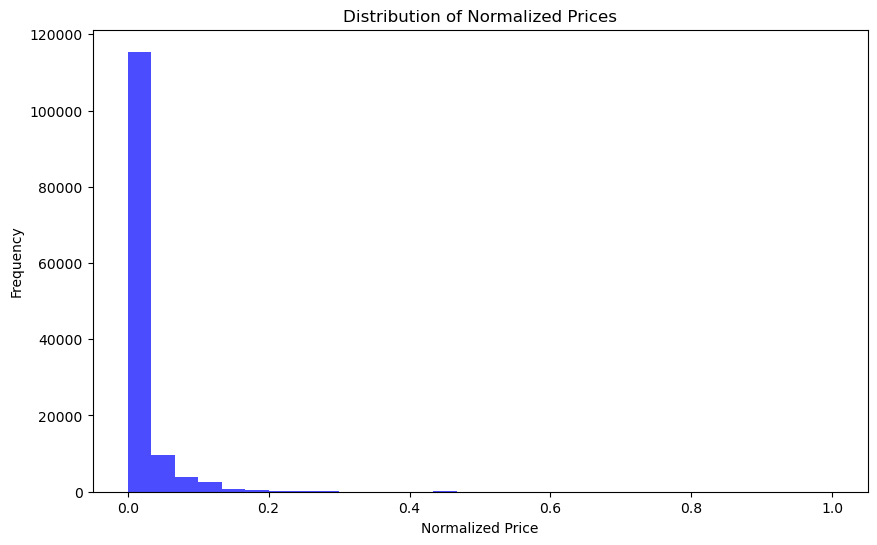

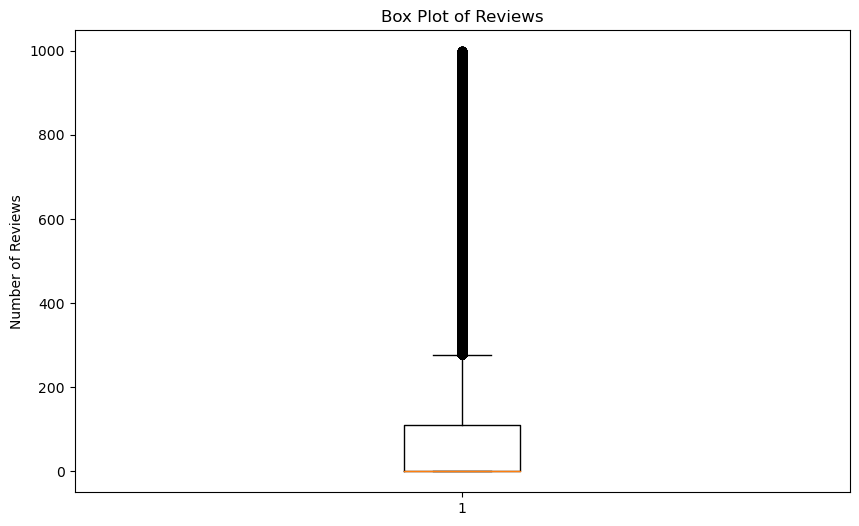

In [97]:
import matplotlib.pyplot as plt

# Histogram of normalized prices
plt.figure(figsize=(10, 6))
plt.hist(data['normalized_price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Normalized Prices')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for reviews
plt.figure(figsize=(10, 6))
plt.boxplot(data['reviews'][data['reviews'] < 1000])  # Filter extreme outliers for better visualization
plt.title('Box Plot of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


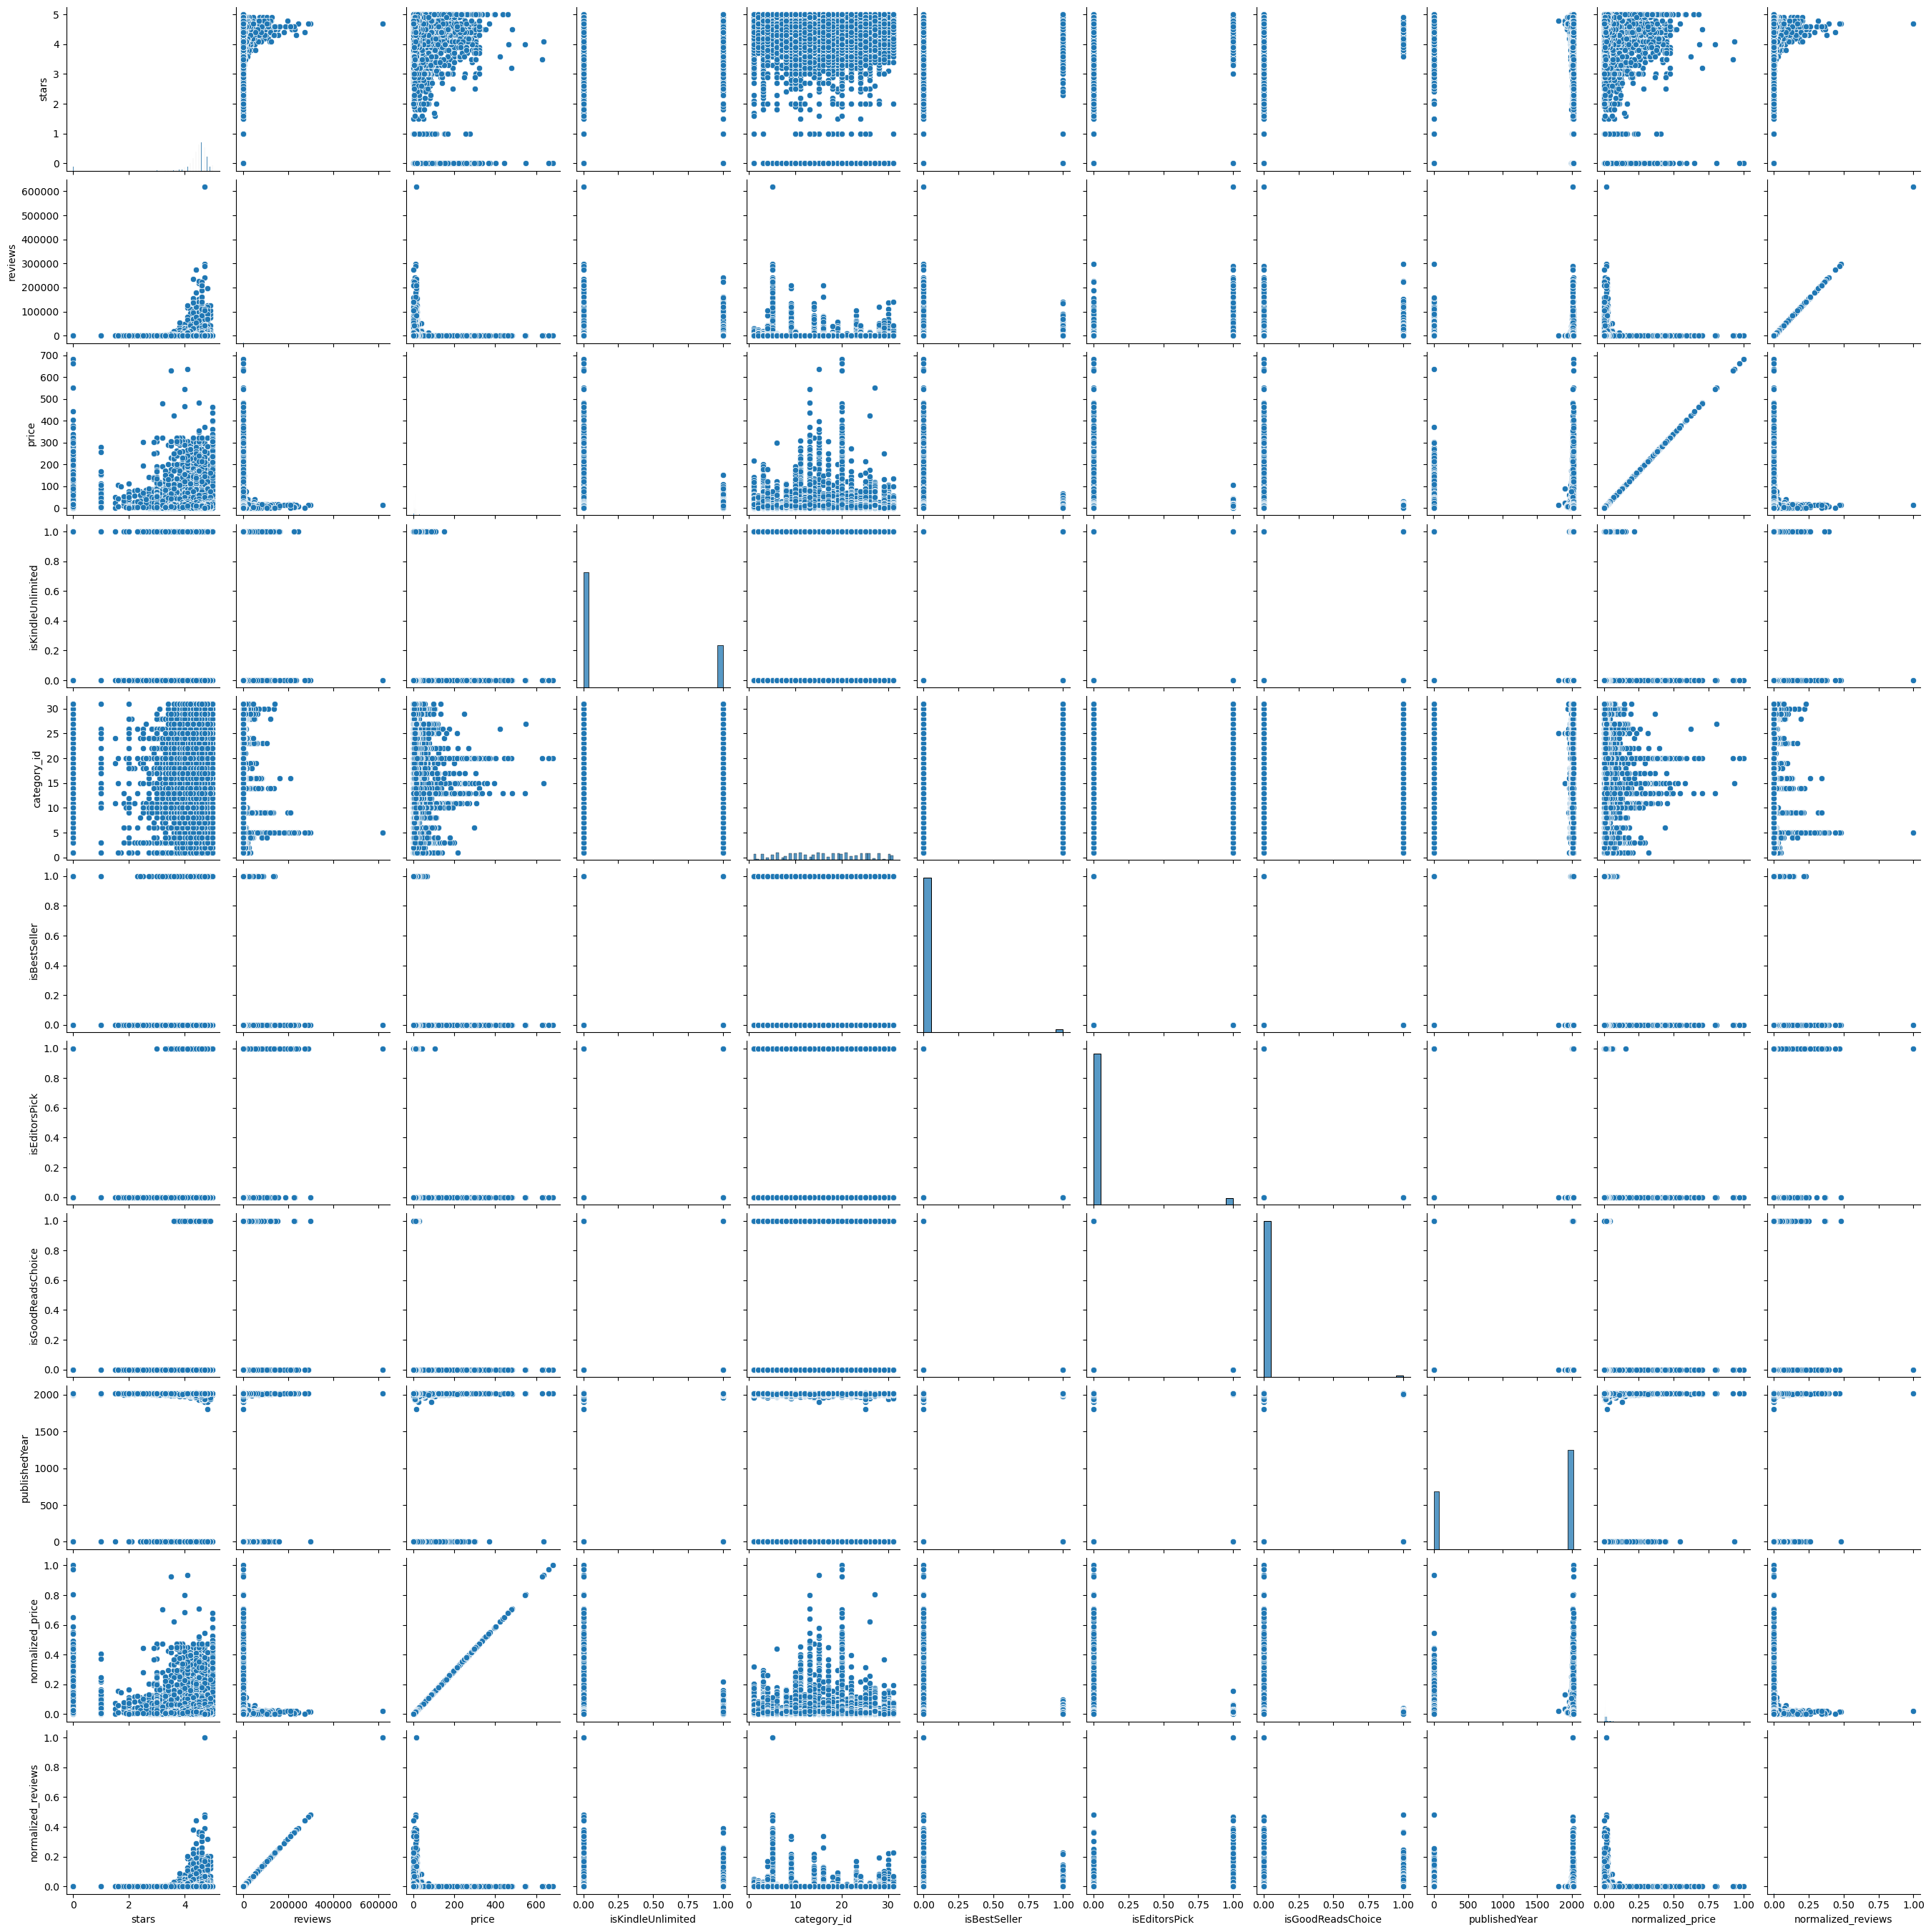

In [100]:
import seaborn as sns

sns.pairplot(data)
plt.show()

C:\Users\vinay\AppData\Local\Temp\ipykernel_31936\2832266816.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


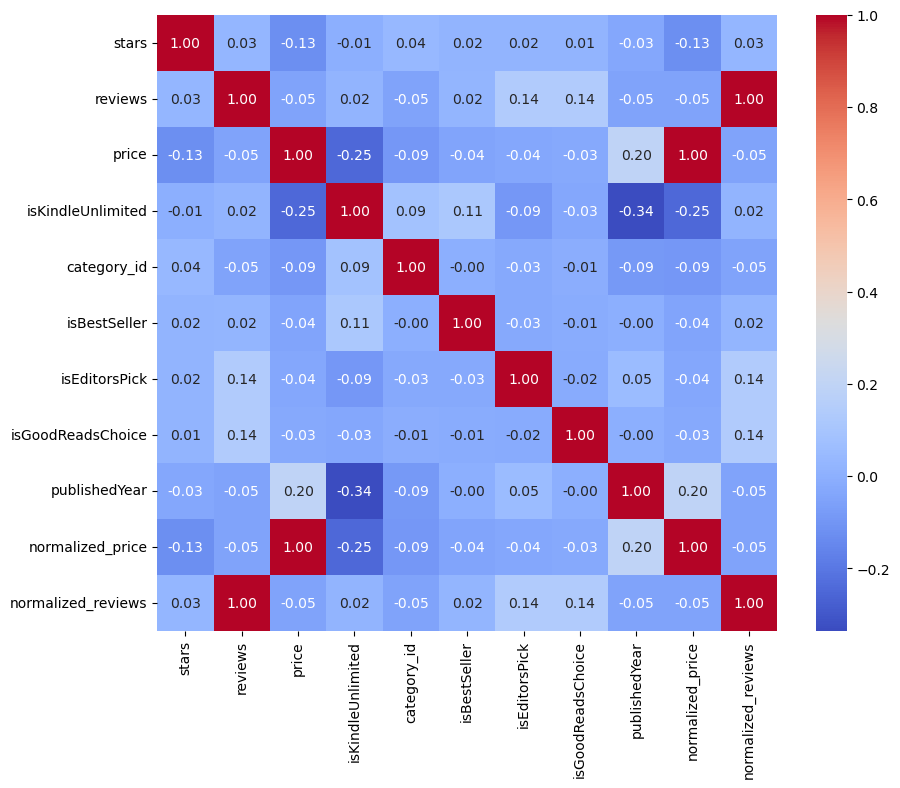

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()